# Imports

In [28]:
import os
import numpy as np
import matplotlib.pyplot as plt
from skimage import color, io
import laserbeamsize as lbs

save_flag=False

# Load files

In [29]:
path = os.path.abspath(os.getcwd())
file = 'menlo_beam_check_1mW_thorlabs_dcc1545mgl_1.tif'

beam = io.imread(os.path.join(path, file))

# Convert to grayscale
R, G, B = beam[:,:,0], beam[:,:,1], beam[:,:,2]
beam = 0.2989*R + 0.5870*G + 0.1140*B

# Analyze gaussian beam

The center of the beam ellipse is at (571, 415)
The ellipse diameter (closest to horizontal) is 229 pixels
The ellipse diameter (closest to   vertical) is 246 pixels
The ellipse is rotated -10° ccw from horizontal


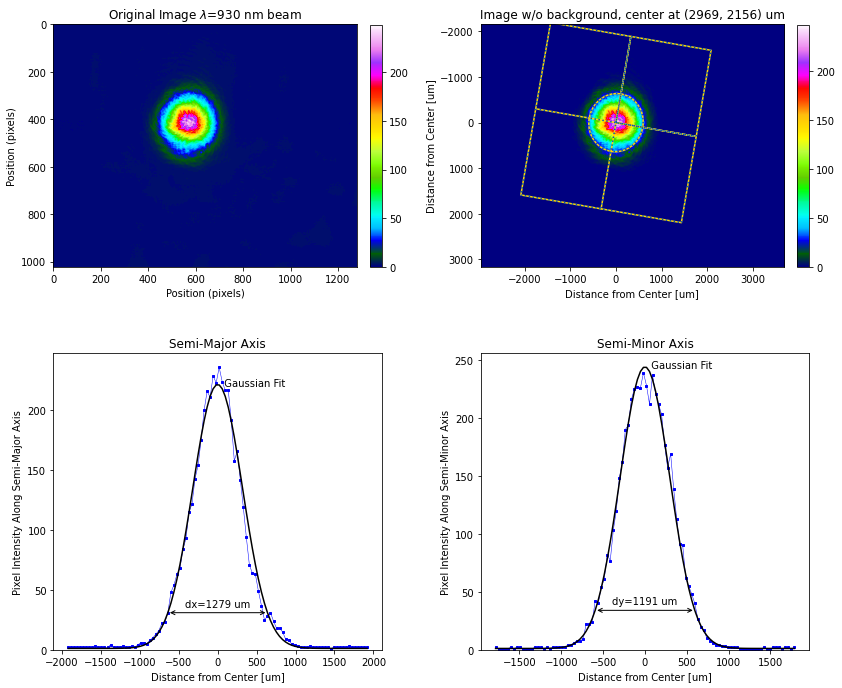

In [33]:
x, y, dx, dy, phi = lbs.beam_size(beam)

print("The center of the beam ellipse is at (%.0f, %.0f)" % (x,y))
print("The ellipse diameter (closest to horizontal) is %.0f pixels" % dx)
print("The ellipse diameter (closest to   vertical) is %.0f pixels" % dy)
print("The ellipse is rotated %.0f° ccw from horizontal" % (phi*180/3.1416))

DCC1545M_px_size = 5.20 # in um, check https://www.thorlabs.com/drawings/ffb3d361acacead0-2CF9AD2F-C1E9-13FA-C4637184DF633781/DCC1545M-Manual.pdf
lbs.beam_size_plot(beam, r"Original Image $\lambda$=930 nm beam", pixel_size = DCC1545M_px_size, units='um')

if save_flag: plt.savefig('./plots/gaussian_beam_analysis.png')